In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json("dataset.json")
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


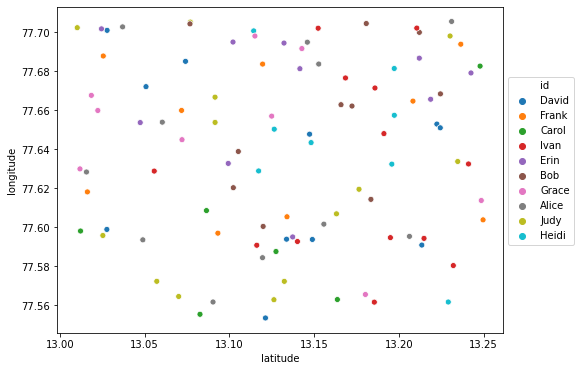

In [2]:
## plotting a scatter plot to visualize the data points
plt.figure(figsize=(8,6))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="id")
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

## Preparing the DBScan Model

In [3]:
def find_infected_persons(name):
    epsilon = 0.0018288
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != name):
                    infected_names.append(member_id)
                else:
                    pass
    
    
    

    return infected_names

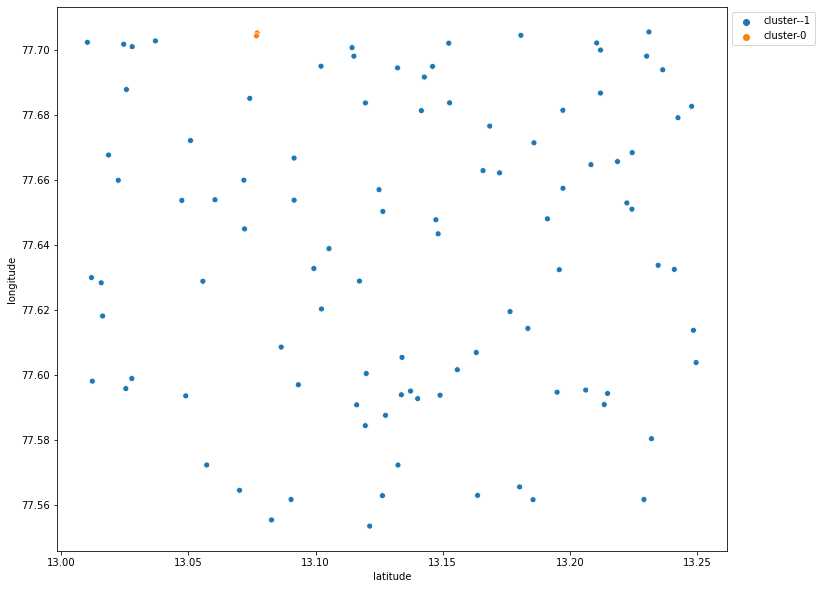

[]


In [15]:
## generating clusters using the fitted model
# labels = model.labels_
labels = df['cluster']
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

print(find_infected_persons('David'))

In [14]:
df['cluster']

0    -1
1    -1
2    -1
3    -1
4    -1
     ..
95   -1
96   -1
97   -1
98   -1
99   -1
Name: cluster, Length: 100, dtype: int64

In [ ]:
print(find_infected_persons("Bob"))

In [12]:
print(find_infected_persons("Ivan"))

[]
